In [290]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [291]:
#Description: This program predicts whether a passenger wil survive on the titanic or not
titanic_df = pd.read_csv("Titanic_Train.csv")

In [292]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [293]:
#Checking the number of rows and columns in the train data set
titanic_df.shape

(891, 12)

In [294]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


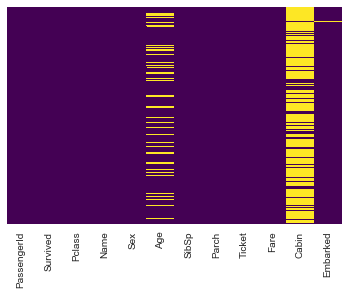

In [295]:
#Plot missing values 
sns.heatmap(titanic_df.isnull(), yticklabels= False, cbar= False,cmap= 'viridis')

In [296]:
titanic_df['Age'].value_counts().sum()

714

In [297]:
#Function to determine the missing values in all columns of the dataframe
def missing_vals(df, columns):
    missing = {}
    
    df_length= len(df)
    
    for column in columns:
        total_col_val = df[column].value_counts().sum()
        missing[column]= df_length- total_col_val
    return missing
print(missing_vals(titanic_df, columns = titanic_df.columns))

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


In [298]:
#Data types in df
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


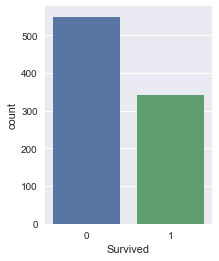

In [299]:
#Check how many people survived
fig= plt.figure(figsize=(3,4))
sns.countplot(x= "Survived", data=titanic_df)
print(titanic_df['Survived'].value_counts())

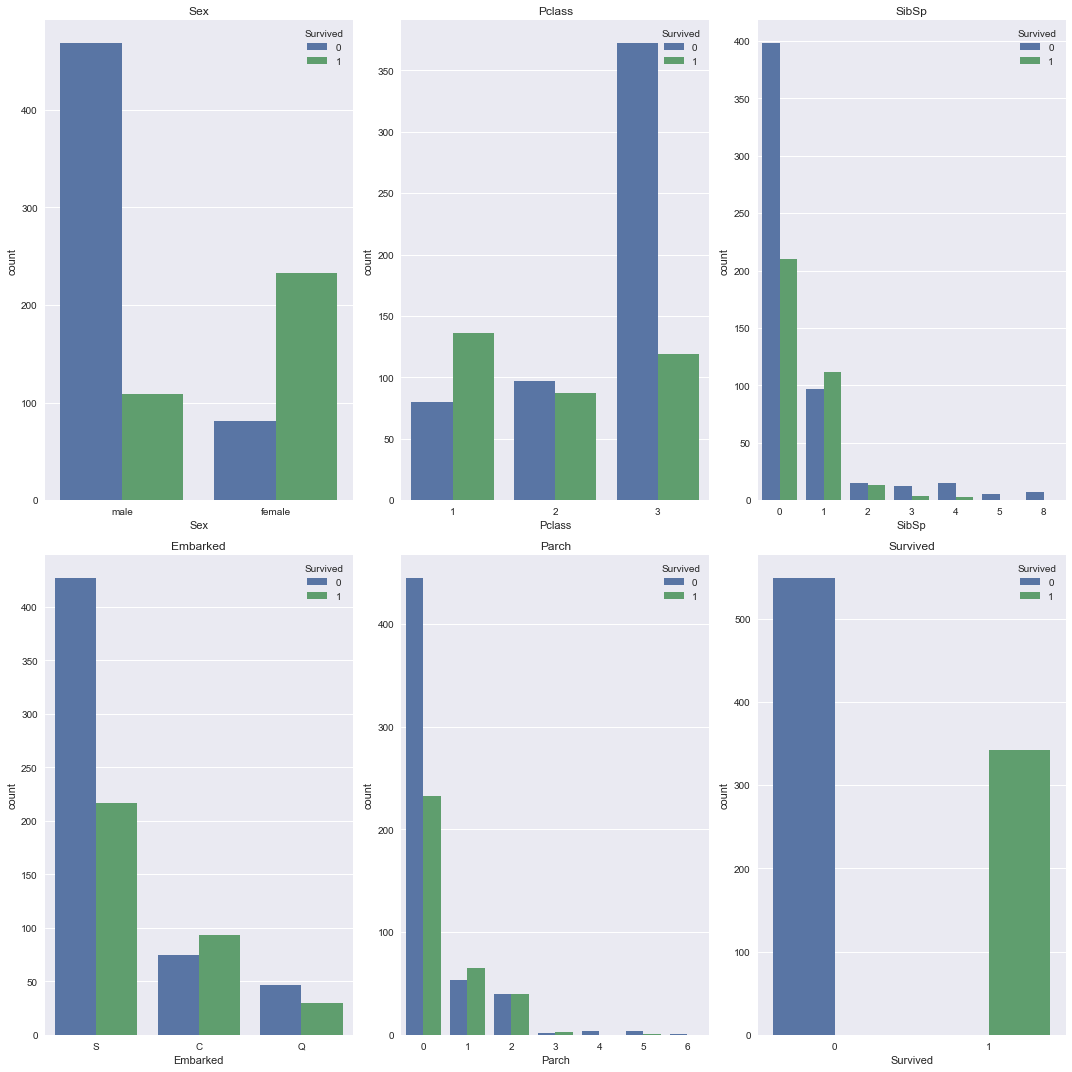

In [300]:
#How many people survived based on different factors, this will give us visibility on 
cols = ['Sex', 'Pclass', 'SibSp', 'Embarked', 'Parch', 'Survived']

n_rows= 2
n_cols=3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,15))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        ax=axs[r][c] #show where to position each plot
        sns.countplot(titanic_df[cols[i]], hue= titanic_df['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title= 'Survived', loc= 'upper right')
plt.tight_layout()
        

In [301]:
titanic_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [302]:
#Find survival rate based on class and sex
titanic_df.pivot_table('Survived', index='Sex', columns=['Pclass'])

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


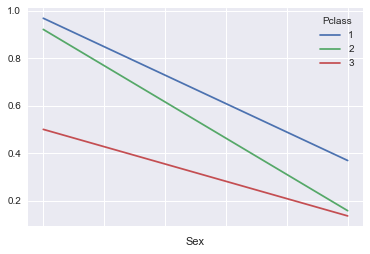

In [303]:
titanic_df.pivot_table('Survived', index='Sex', columns=['Pclass']).plot()

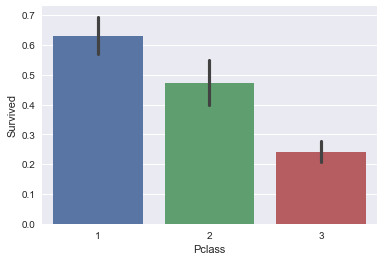

In [304]:
#Plot survival rate of each class
sns.barplot(x='Pclass', y='Survived', data= titanic_df)

In [305]:
#Survival rate based on Sex, Age, Class
age= pd.cut(titanic_df['Age'], [0,18,80])
titanic_df.pivot_table('Survived', index= ['Sex', age], columns='Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (18, 80]  0.909091  1.000000  0.511628
       NaN       0.972973  0.900000  0.423729
male   (18, 80]  0.800000  0.600000  0.215686
       NaN       0.375000  0.071429  0.133663

In [306]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

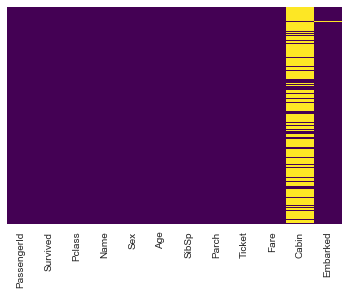

In [307]:
#Plot missing values 
sns.heatmap(titanic_df.isnull(), yticklabels= False, cbar= False,cmap= 'viridis')

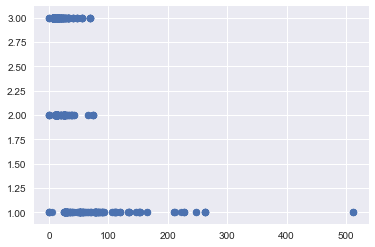

In [308]:
#Price paid for each class
plt.scatter(titanic_df['Fare'], titanic_df['Pclass'])

In [309]:
#Drop columns
titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df=titanic_df.dropna(subset=['Embarked'])

In [310]:
titanic_df.shape

(889, 8)

In [311]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [312]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [313]:
#need to change Sex and Embarked
embarked= pd.get_dummies(titanic_df['Embarked'], drop_first=True)
sex= pd.get_dummies(titanic_df['Sex'], drop_first=True)

In [324]:
titanic_df=pd.concat([titanic_df, sex, embarked], axis=1)

In [325]:
titanic_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
titanic_df.dtypes

In [327]:
#Split data in test and train
X= titanic_df.iloc[:,1:8].values
y= titanic_df.iloc[:,0].values

In [328]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [331]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [339]:
#Create a function with multiple models
def models (X_train, y_train):
    #Use logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Use K nearest neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    
    #Support Vector Classifier
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    
    # SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    #Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss= GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Decision Tree classifier
    from sklearn.tree import DecisionTreeClassifier
    tree= DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    #Random Forecast classifier
    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier(n_estimators= 10,criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    #Training accuracy
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Knn Training Accuracy:', knn.score(X_train, y_train))
    print('[2]SVC linear Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]SVC rbf Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[5]Decision Tree Training Accuracy:', tree.score(X_train, y_train))
    print('[6]Random Forest Training Accuracy:', forest.score(X_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    

In [340]:
model= models (X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.7848101265822784
[1]Knn Training Accuracy: 0.8621659634317862
[2]SVC linear Training Accuracy: 0.7749648382559775
[3]SVC rbf Training Accuracy: 0.8396624472573839
[4]Naive Bayes Training Accuracy: 0.7791842475386779
[5]Decision Tree Training Accuracy: 0.9873417721518988
[6]Random Forest Training Accuracy: 0.9732770745428974


/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [341]:
#Show confusion matrix and accuracy for all models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for i in range (len(model)):
    cm=confusion_matrix(y_test, model[i].predict(X_test))
    acc_score= accuracy_score(y_test, model[i].predict(X_test))    
    print(cm)
    print('Model[{}] testing accuracy={}'.format(i,acc_score))
    

[[94 11]
 [19 54]]
Model[0] testing accuracy=0.8314606741573034
[[98  7]
 [23 50]]
Model[1] testing accuracy=0.8314606741573034
[[93 12]
 [18 55]]
Model[2] testing accuracy=0.8314606741573034
[[102   3]
 [ 30  43]]
Model[3] testing accuracy=0.8146067415730337
[[93 12]
 [17 56]]
Model[4] testing accuracy=0.8370786516853933
[[76 29]
 [22 51]]
Model[5] testing accuracy=0.7134831460674157
[[97  8]
 [29 44]]
Model[6] testing accuracy=0.7921348314606742
